# Relax Inc. Data Science Take-Home Challenge

## Introduction
Our task is to analyze user engagement with the Relax website and learn which variables relate to user retention. We looked at two files: takehome_user_engagement.csv and takehome_users.csv to first understand which users are adopted users, and how they interact with the website. 

First some groundwork: Users are considered adopted users if they have logged into the site three or more times within a seven day period. Otherwise we considerd them non-adopted users. 

To analyze these different users we look at the takehome_users.csv files which contains the following variables: 
- name
- object_id
- email
- creation_source
    -  Personal_Projects: Inivted via another user's personal workspace
    -  Guest_Invite: Invited to an organization as a guest (limited permissions)
    -  Org_Invite: Inivted to an organization (as a full member)
    -  Sign_Up: Signed up via the website
    -  Signup_google_auth: signed up using Google Authentication (using a Google email account for their login id)
- creation_time
- last_session_creation_time
- opted_in_to_mailing_list
- enabled_for_marketing_drop
- org_id
- invited_by_user_id

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Name and read in the associated files.

In [2]:
# Set up filenames
engagement_file = 'takehome_user_engagement.csv'
users_file = 'takehome_users.csv'

# Read in the csv files as dataframes
e_df = pd.read_csv(engagement_file, encoding='latin-1', header = 0)
u_df = pd.read_csv(users_file, encoding='latin-1', header = 0)

#### Build lists of adopted and non-adopted users, and a classification. (1 = adopted user, 0 = non-adopted user)

In [3]:
no_login_users = []
has_login_users = []
adopted_users = []
non_adopted_users = []
classification = []

e_id_set = set(e_df['user_id'])

for i in range(1, 12001):
#    print('Currently working on user_id:', i) # This line is for debugging purposes. Uncomment to see print-out
    if i in e_id_set:
        has_login_users.append(i)
        # cu_df is current user df
        cu_df = e_df.loc[e_df['user_id'] == i]
        cu_dates = cu_df['time_stamp']
        df = pd.to_datetime(cu_dates)
        df.index = np.arange(0,len(df))
        if len(df) > 2:
            for j in range(2,len(df)):
                timespan = df[j] - df[j-2]
                if timespan.days < 7:
                    adopted_users.append(i)            
    else:
        no_login_users.append(i)
         
# Conduct set operations and order the lists
no_login_users_set = set(no_login_users)
has_login_users_set = set(has_login_users)
adopted_users_set = set(adopted_users)
non_adopted_users_set = has_login_users_set - adopted_users_set

adopted_users = list(adopted_users_set)
adopted_users = sorted(adopted_users)


non_adopted_users = list(non_adopted_users_set)
non_adopted_users = sorted(non_adopted_users)

# Classification
classification = []
for i in range(0,12000):
    if i in adopted_users:
        classification.append(1)
    else:
        classification.append(0)

Next we want to quantify the creation_source column, as entering non-numeric data into our Random Forest Classifier will lead to errors. A simple for loop will take care of this. We execute it for both au_df, and nau_df (Adopted user dataframe and non-adopted user dataframe)

In [4]:
au_df = u_df.loc[adopted_users]
au_source = au_df['creation_source']
au_source.index = np.arange(0,len(au_df))
au_source_nums = []
for i in range(len(au_source)):
    if au_source[i] == 'PERSONAL_PROJECTS':
        au_source_nums.append(1)
    elif au_source[i] == 'GUEST_INVITE':
        au_source_nums.append(2)
    elif au_source[i] == 'ORG_INVITE':
        au_source_nums.append(3)
    elif au_source[i] == 'SIGNUP':
        au_source_nums.append(4)
    else:
        au_source_nums.append(5)


au_mailing = au_df['opted_in_to_mailing_list']
au_marketing = au_df['enabled_for_marketing_drip']

au_small_df = au_df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']]
au_small_df.index = np.arange(0,len(au_small_df))
au_small_df['creation_source'] = au_source_nums

# Repeat for Non-Adopted Users (nau)

nau_df = u_df.loc[non_adopted_users]
nau_source = nau_df['creation_source']
nau_source.index = np.arange(0,len(nau_df))
nau_source_nums = []
for i in range(len(nau_source)):
    if nau_source[i] == 'PERSONAL_PROJECTS':
        nau_source_nums.append(1)
    elif nau_source[i] == 'GUEST_INVITE':
        nau_source_nums.append(2)
    elif nau_source[i] == 'ORG_INVITE':
        nau_source_nums.append(3)
    elif nau_source[i] == 'SIGNUP':
        nau_source_nums.append(4)
    else:
        nau_source_nums.append(5)
        
# A couple more tidying up steps
nau_mailing = nau_df['opted_in_to_mailing_list']
nau_marketing = nau_df['enabled_for_marketing_drip']


nau_small_df = nau_df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']]
nau_small_df.index = np.arange(0,len(nau_small_df))
nau_small_df['creation_source'] = nau_source_nums

C:\Users\Jon\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jon\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Plot the quantifiable non-ID non-time-series variables 
It is important to note that in a larger scale projects I would suggest that Relax Inc. investigate if the user id's that referred individuals were assigned to adopted users. As this would suggest that users who enthusiastically used the web service could be more likely to recommend the service to their friends and colleagues. 

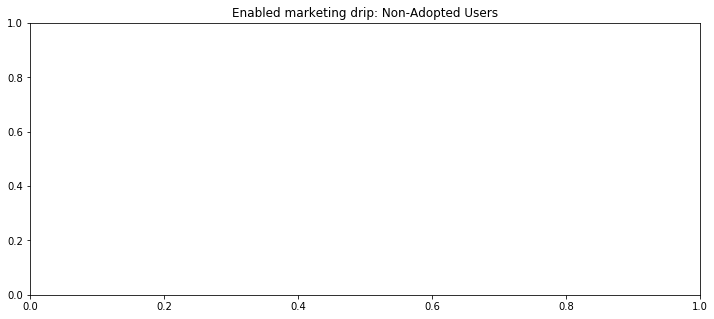

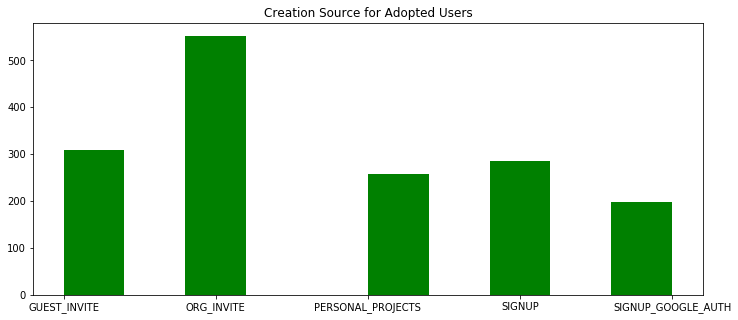

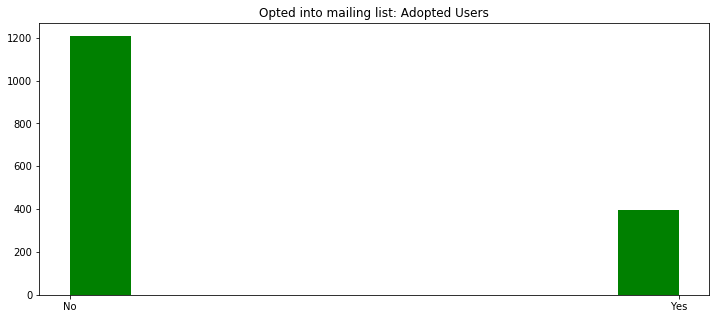

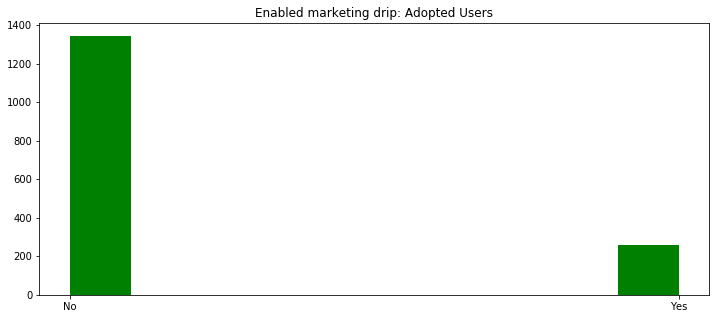



Few variables Non-Adopted Users


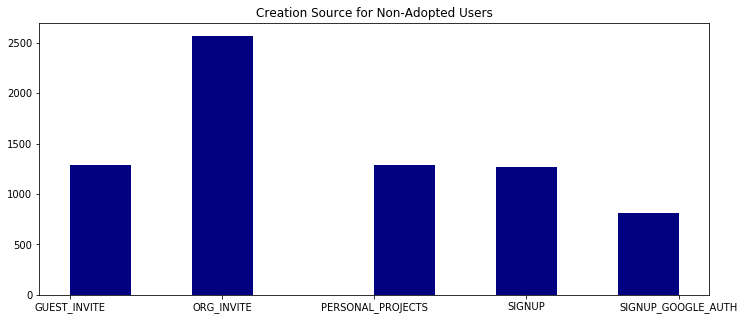

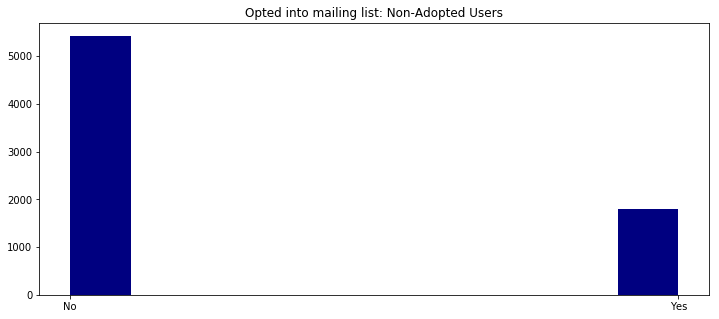

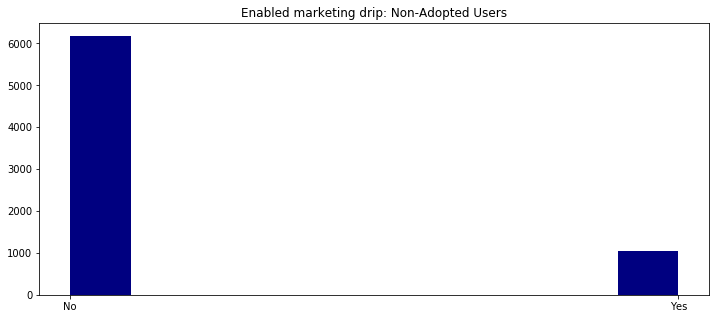

In [81]:
# Few variables hist
# print('Few variables Adopted Users')
# au_small_group_hist  = au_small_df.hist(bins = 5, color = 'green')
# plt.show()
# plt.clf()
# plt.figure(figsize=(20,10))
plt.figure(figsize = (12,5))
plt.title('Creation Source for Adopted Users')
plt.hist(au_source.dropna(), color = 'green')
plt.show()
plt.clf()

plt.figure(figsize = (12,5))
plt.title('Opted into mailing list: Adopted Users')
plt.hist(au_mailing, color = 'green')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()
plt.clf()

plt.figure(figsize = (12,5))
plt.title('Enabled marketing drip: Adopted Users')
plt.hist(au_marketing, color = 'green')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()
plt.clf()


# plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

print('\n\nFew variables Non-Adopted Users')
# nau_small_group_hist = nau_small_df.hist(bins = 5, color = 'red')
# plt.show()# plt.clf()
plt.figure(figsize = (12,5))
plt.title('Creation Source for Non-Adopted Users')
plt.hist(nau_source.dropna(), color = 'navy')
plt.show()
plt.clf()

plt.figure(figsize = (12,5))
plt.title('Opted into mailing list: Non-Adopted Users')
plt.hist(nau_mailing.dropna(), color = 'navy')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()
plt.clf()

plt.figure(figsize = (12,5))
plt.title('Enabled marketing drip: Non-Adopted Users')
plt.hist(nau_marketing.dropna(), color = 'navy')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()
plt.clf()

Notice that the ratios of these bar plots are fairly similar. While there is some minor visual difference in the creation_source plots that leads us to hypothesize that creation_source will be the most important variable, we will want to compare these to the results of the feature_importances_ of the Random Forest Classifier.

#### Add a classifier column to the user data frame and prep for machine learning

In [6]:
# Add a classifier column to the original dataframe that indicates
# an adopted or a non-adopted user.
# Then create a random forest classifier
# Then get importances

u_source = u_df['creation_source']
u_source_nums = []
for i in range(len(u_source)):
    if u_source[i] == 'PERSONAL_PROJECTS':
        u_source_nums.append(1)
    elif u_source[i] == 'GUEST_INVITE':
        u_source_nums.append(2)
    elif u_source[i] == 'ORG_INVITE':
        u_source_nums.append(3)
    elif u_source[i] == 'SIGNUP':
        u_source_nums.append(4)
    else:
        u_source_nums.append(5)
u_df['creation_source'] = u_source_nums
u_df['classification'] = classification

# Create small u_df   
su_df = u_df[['classification', 'creation_source', 
              'opted_in_to_mailing_list', 
              'enabled_for_marketing_drip']] 

#### Imports for Machine Learning

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\Jon\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Train test split

In [8]:
X = su_df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']]
y = su_df['classification']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)     


Build the training model

In [9]:
clf = RandomForestClassifier(random_state = 42)
# print('Training Model: ')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Finished Predictions for small df')
print(accuracy_score(y_test, y_pred))  

Finished Predictions for small df
0.873888888889


#### Feature Importances

                            importance
feature                               
creation_source                  0.751
enabled_for_marketing_drip       0.166
opted_in_to_mailing_list         0.083


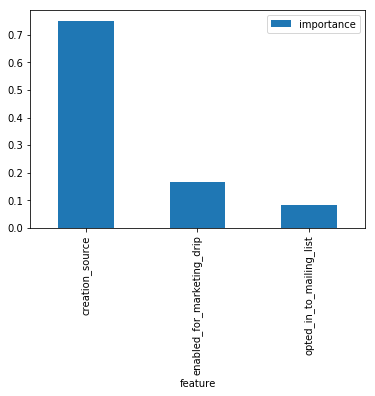

In [10]:
feature_imps = clf.feature_importances_
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances)
importances.plot.bar()
plt.show()
plt.clf()

As expected from the minor difference in the minor difference in creation source between adopted and non-adopted users, creation_source is the most important variable. But how important are the variables in determining who is the most likely to adopt the service. To determine this we look at the predicted probabilities of becoming an adopted user.

#### Predicting probabilities using quantile ranges. 
The following probability predictions are being purposed to reflect a practice done in banking where a data scientist attempts to deduce which variables are the most influential in a debitor defaulting on a loan.

In our case, we know the Random Forest Classifier found that the signup source is important. Unfortunately, that doesn't tell us if the signup sources were more influential in bringing people to the service, or driving them away. If we look at predict_proba and split it up by quantiles we can look at the lowest probability of becoming an adopted user with the idea that whatever is most important in that quantile is detrimental to customer experience and then look at largest probability sections as variables that are influential in customer retention. 

The quantile ranges were developed using pd.qcut

In [11]:
# Now look at predict proba
probability = clf.predict_proba(X)

df_new = su_df.copy()
df_new['Probability_of_Adoption'] = probability[:,1]

Q1 = [] # [0.0432, 0.121]
Q2 = [] # (0.121, 0.123]
Q3 = [] # (0.123, 0.125]
Q4 = [] # (0.125, 0.133]
Q5 = [] # (0.133, 0.142]
Q6 = [] # (0.142, 0.148]
Q7 = [] # (0.148, 0.152]
Q8 = [] # (0.152, 0.222]

for i in range(len(df_new)):
    if 0.0432 <= df_new['Probability_of_Adoption'][i] <= 0.121:
        Q1.append(i)
        
    elif 0.121 <= df_new['Probability_of_Adoption'][i] <= 0.123:
        Q2.append(i)
        
    elif 0.123 < df_new['Probability_of_Adoption'][i] <= 0.125:
        Q3.append(i)
        
    elif 0.125 < df_new['Probability_of_Adoption'][i] <= 0.133:
        Q4.append(i)
    
    elif 0.133 < df_new['Probability_of_Adoption'][i] <= 0.142:
        Q5.append(i)   
        
    elif 0.142 < df_new['Probability_of_Adoption'][i] <= 0.148:
        Q6.append(i)
        
    elif 0.148 < df_new['Probability_of_Adoption'][i] <= 0.152:
        Q7.append(i)
        
    elif 0.152 < df_new['Probability_of_Adoption'][i] <= 0.222:
        Q8.append(i)
        
q1_df = df_new.loc[Q1]
q2_df = df_new.loc[Q2]
q3_df = df_new.loc[Q3]
q4_df = df_new.loc[Q4]
q5_df = df_new.loc[Q5]
q6_df = df_new.loc[Q6]
q7_df = df_new.loc[Q7]
q8_df = df_new.loc[Q8]


#### Note on fixed random state: 
We fix the random state below to solve the issue of quantiles being empty depending on different train test splits. In this split quantile 2 and 7 are empty in this random_state = 42


In [12]:
# -----------
#
# Quantile 1
#
# -----------
print('\n')
print('\n')

if q1_df.empty:
    print('Quartile 1 is empty:')
else:
    X = q1_df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']]
    y = q1_df['classification']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)     
    
    clf = RandomForestClassifier(random_state = 42)
    print('Training Model: ')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print('Finished Predictions for Quantile 1')
    print(accuracy_score(y_test, y_pred))  
    
    feature_imps = clf.feature_importances_
    importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')
    print(importances)
    q1_importances = importances
# =============================================================================
#     importances.plot.bar()
#     plt.title('Quantile 1 [0.0432, 0.121]')
#     plt.show()
#     plt.clf()
# =============================================================================





Training Model: 
Finished Predictions for Quantile 1
0.877976190476
                            importance
feature                               
creation_source                  0.872
enabled_for_marketing_drip       0.128
opted_in_to_mailing_list         0.000


In [13]:
# -----------
#
# Quantile 2
#
# -----------+
print('\n')
    
if q2_df.empty:
    print('Quartile 2 is empty:')
else:    
    X = q2_df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']]
    y = q2_df['classification']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)     
    
    clf = RandomForestClassifier(random_state = 42)
    print('Training Model: ')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print('Finished Predictions for Quantile 2')
    print(accuracy_score(y_test, y_pred))  
    
    feature_imps = clf.feature_importances_
    importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')
    print(importances)
    q2_importances = importances
# =============================================================================
#     importances.plot.bar()
#     plt.title('Quantile 2 (0.121, 0.123]')
#     plt.show()
#     plt.clf()
# =============================================================================



Quartile 2 is empty:


In [14]:
# -----------
#
# Quantile 3
#
# -----------
print('\n')

if q3_df.empty:
    print('Quartile 3 is empty:')
else:    
    X = q3_df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']]
    y = q3_df['classification']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)     
    
    clf = RandomForestClassifier(random_state = 42)
    print('Training Model: ')
    clf.fit(X_train, y_train) 
    
    y_pred = clf.predict(X_test)
    
    print('Finished Predictions for Quantile 3')
    print(accuracy_score(y_test, y_pred))  
    
    feature_imps = clf.feature_importances_
    importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')
    print(importances)
    q3_importances = importances
# =============================================================================
#     importances.plot.bar()
#     plt.title('Quantile 3 (0.123, 0.125]')
#     plt.show()
#     plt.clf()
# =============================================================================



Quartile 3 is empty:


In [15]:
# -----------
#
# Quantile 4 
#
# -----------
print('\n')

if q4_df.empty:
    print('Quartile 4 is empty:')
else:
    X = q4_df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']]
    y = q4_df['classification']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)     
    
    clf = RandomForestClassifier(random_state = 42)
    print('Training Model: ')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print('Finished Predictions for Quantile 4')
    print(accuracy_score(y_test, y_pred))  
        
    feature_imps = clf.feature_importances_
    importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')
    print(importances)
    q4_importances = importances
# =============================================================================



Training Model: 
Finished Predictions for Quantile 4
0.884773662551
                            importance
feature                               
enabled_for_marketing_drip         0.4
creation_source                    0.3
opted_in_to_mailing_list           0.3


In [16]:
# -----------
#
# Quantile 5
#
# -----------
print('\n')

if q5_df.empty:
    print('Quartile 5 is empty:')
else:    
    X = q5_df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']]
    y = q5_df['classification']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)     
    
    clf = RandomForestClassifier(random_state = 42)
    print('Training Model: ')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print('Finished Predictions for Quantile 5')
    print(accuracy_score(y_test, y_pred))  
    
    feature_imps = clf.feature_importances_
    importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')
    print(importances)
    q5_importances = importances



Training Model: 
Finished Predictions for Quantile 5
0.883843717001
                            importance
feature                               
creation_source                  0.664
opted_in_to_mailing_list         0.178
enabled_for_marketing_drip       0.158


In [17]:
# -----------
#
# Quantile 6
#
# -----------
print('\n')

if q6_df.empty:
    print('Quartile 6 is empty:')
else:
    X = q6_df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']]
    y = q6_df['classification']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)     
    
    clf = RandomForestClassifier(random_state = 42)
    print('Training Model: ')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print('Finished Predictions for Quantile 6')
    print(accuracy_score(y_test, y_pred))  
    
    feature_imps = clf.feature_importances_
    importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')
    print(importances)
    q6_importances = importances
# =============================================================================
#     importances.plot.bar()
#     plt.title('Quantile 6 (0.142, 0.148]')
#     plt.show()
#     plt.clf()
# =============================================================================



Training Model: 
Finished Predictions for Quantile 6
0.90395480226
                            importance
feature                               
creation_source                    1.0
opted_in_to_mailing_list           0.0
enabled_for_marketing_drip         0.0


In [18]:
%%capture
# -----------
#
# Quantile 7
#
# -----------
print('\n')

if q7_df.empty:
    print('Quartile 7 is empty:')
else:    
    X = q7_df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']]
    y = q7_df['classification']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)     
    
    clf = RandomForestClassifier(random_state = 42)
    print('Training Model: ')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print('Finished Predictions for Quantile 7')
    print(accuracy_score(y_test, y_pred))  
    
    feature_imps = clf.feature_importances_
    importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')
    print(importances)
    q7_importances = importances
# =============================================================================

In [19]:
# -----------
#
# Quantile 8 
#
# -----------
print('\n')

if q8_df.empty:
    print('Quartile 8 is empty:')
else:
    X = q8_df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']]
    y = q8_df['classification']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)     
    
    clf = RandomForestClassifier(random_state = 42)
    print('Training Model: ')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print('Finished Predictions for Quantile 8')
    print(accuracy_score(y_test, y_pred))  
    
    feature_imps = clf.feature_importances_
    importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')
    print(importances)
    q8_importances = importances
# =============================================================================
#     importances.plot.bar()
#     plt.title('Quantile 8 (0.152, 0.222]')
#     plt.show()
#     plt.clf()
# =============================================================================



Training Model: 
Finished Predictions for Quantile 8
0.851581508516
                            importance
feature                               
creation_source                  0.681
opted_in_to_mailing_list         0.172
enabled_for_marketing_drip       0.148


#### Summary of quantile analysis
Over several runs the only consistent truth was that the lower probabilities of adopting were correlated with opting into the mailing list. This would imply one of two things:
1. The mailing list makes logging in not worthwhile
2. Users find the content annoying or the newsletters are being filtered as spam

## Write-Up
This projects looks at both user engagement (takehome_user_engagement.csv) and user website interactions (takehome_users.csv) among 12,000 users.

The task is to determine what contributes to users adopting website visits to Relax.inc as a part of their weekly routine. A user is considered to have adopted the service once they login three times within the same week. After some data wrangling the users were separated into distinct lists of adopted and non-adopted users, which were then used to created two separate dataframes au_df and nau_df. Plots of the variables in these files showed that only three varaibles would be of key interest (as they were the only non-ID, non login-timeseries values) to differentiate the groups:

- creation_source: This refers to where the user's account originated from. Be it google, a referral, or directly from the site. 
- opted_in_to_mailing_list: This indicates whether or not the user opted into the mailing list. 
- enabled_for_marketing_drip: Whether or not they are on the regular email marketing drip.

After constructing a Random Forest Classifier using a 70/30 train/test split on su_df (This is the users data frame with the columns mentioned above) relative importance between the three variables in question were determined: 
1. Creation source was far more important than mailing list or marketing drip.
2. Optining into the mailing list was slightly more important than enabling marketing drip.
3. Finally, enabling marketing drip was less important than the other two conditions.


While this informs us that the creation_source is, of the three chosen variables, the most important for determining who is likely to become an adopted member, we still look to learn what is indicative of the different degrees of probability that a user will adopt the service. The logical hypothesis would be the creation_source, but after analyzing quantiles of the predicited probabilities for becoming an adopted member we see another story.

After breaking down the quantiles and constructing Random Forest Classifiers on each subset of data we learn that in the least probable bracket whether or not the user opted into the mailing list is the most important. Meanwhile, in the most probable set the most important variable was whether or not they were in the marketing drip.

This could point to the mailing list being filtered out as spam by various email servies, or perhaps the users do not like the mailing list content. I would recommend that Relax.Inc do a user survey regarding their mailing list and marketing drip.